# Finding and Searching for Data while Cleaning

In [2]:
#Start of the Program
#Import the necessary languages and libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

### Overview of Dataset

In [4]:
#Save and load the following dataset for reference
df = pd.read_csv('spotify-2023.csv', encoding='ISO-8859-1')
df

,track_name,artist(s)_name,artist_count,released_year,released_month,released_day,in_spotify_playlists,in_spotify_charts,streams,in_apple_playlists,...,bpm,key,mode,danceability_%,valence_%,energy_%,acousticness_%,instrumentalness_%,liveness_%,speechiness_%
0,Seven (feat. Latto) (Explicit Ver.),"Latto, Jung Kook",2,2023,7,14,553,147,141381703,43,...,125,B,Major,80,89,83,31,0,8,4
1,LALA,Myke Towers,1,2023,3,23,1474,48,133716286,48,...,92,C#,Major,71,61,74,7,0,10,4
2,vampire,Olivia Rodrigo,1,2023,6,30,1397,113,140003974,94,...,138,F,Major,51,32,53,17,0,31,6
3,Cruel Summer,Taylor Swift,1,2019,8,23,7858,100,800840817,116,...,170,A,Major,55,58,72,11,0,11,15
4,WHERE SHE GOES,Bad Bunny,1,2023,5,18,3133,50,303236322,84,...,144,A,Minor,65,23,80,14,63,11,6
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
948,My Mind & Me,Selena Gomez,1,2022,11,3,953,0,91473363,61,...,144,A,Major,60,24,39,57,0,8,3
949,Bigger Than The Whole Sky,Taylor Swift,1,2022,10,21,1180,0,121871870,4,...,166,F#,Major,42,7,24,83,1,12,6
950,A Veces (feat. Feid),"Feid, Paulo Londra",2,2022,11,3,573,0,73513683,2,...,92,C#,Major,80,81,67,4,0,8,6
951,En La De Ella,"Feid, Sech, Jhayco",3,2022,10,20,1320,0,133895612,29,...,97,C#,Major,82,67,77,8,0,12,5


In [5]:
#Measure how many rows and column does the list have according to EDA
#df.shape - show off the exact rows and columns including the title ones
[R, C] = df.shape

print("The given spotify data have a total of ", R, " rows and ", C, " columns in total.")

The given spotify data have a total of  953  rows and  24  columns in total.


In [6]:
#Find the Data Types of each Columns using the function df.dtypes
a = df.dtypes

print("These are the following information about the Data Types of the Spotify Song List:", "\n\n", a)

These are the following information about the Data Types of the Spotify Song List: 

 track_name              object
artist(s)_name          object
artist_count             int64
released_year            int64
released_month           int64
released_day             int64
in_spotify_playlists     int64
in_spotify_charts        int64
streams                 object
in_apple_playlists       int64
in_apple_charts          int64
in_deezer_playlists     object
in_deezer_charts         int64
in_shazam_charts        object
bpm                      int64
key                     object
mode                    object
danceability_%           int64
valence_%                int64
energy_%                 int64
acousticness_%           int64
instrumentalness_%       int64
liveness_%               int64
speechiness_%            int64
dtype: object


In [7]:
#Find if the Spotify List have Missing values or Null spaces
b = df.isnull().sum()

print("The Missing values or Null spaces in each column are found to be:", "\n\n", b)

The Missing values or Null spaces in each column are found to be: 

 track_name               0
artist(s)_name           0
artist_count             0
released_year            0
released_month           0
released_day             0
in_spotify_playlists     0
in_spotify_charts        0
streams                  0
in_apple_playlists       0
in_apple_charts          0
in_deezer_playlists      0
in_deezer_charts         0
in_shazam_charts        50
bpm                      0
key                     95
mode                     0
danceability_%           0
valence_%                0
energy_%                 0
acousticness_%           0
instrumentalness_%       0
liveness_%               0
speechiness_%            0
dtype: int64


### Basic Descriptive Statistics

In [9]:
#Change the column for streams to int so that it can be measured "Used fron youtube video"
df['streams'] = pd.to_numeric(df['streams'], errors='coerce').astype('Int64')

In [10]:
#Find the mean, median, and standard deviation of the following Columns (no more, no less): "Streams Column"
c = df['streams'].mean()
d = df['streams'].median()
e = df['streams'].std()

print("The Streams column have a mean of ", c, ", a median of ", d, "and a standard deviation of ", e, ".")

The Streams column have a mean of  514137424.93907565 , a median of  290530915.0 and a standard deviation of  566856949.038883 .


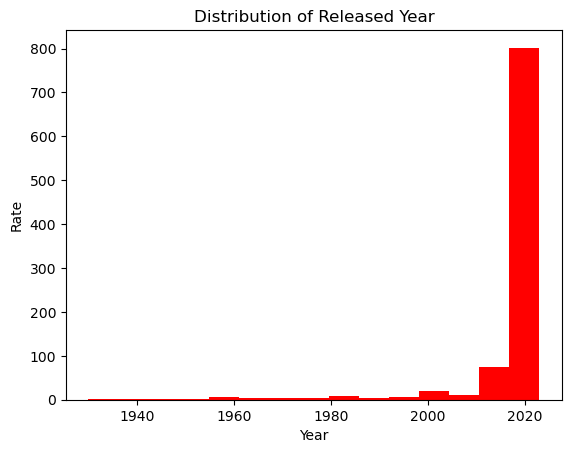

Shown above is the Distribution based on the Released Year of the Songs.


In [11]:
#Find the distribution of the Released Year of the Data
plt.hist(df['released_year'], bins=15, color='red')
plt.title("Distribution of Released Year")
plt.xlabel("Year")
plt.ylabel("Rate")
plt.show()

print("Shown above is the Distribution based on the Released Year of the Songs.")

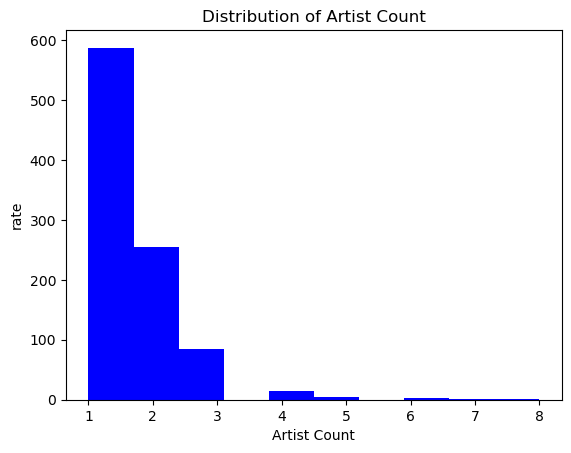

Shown above is the Distribution based on the Artist Count of the Songs.


In [12]:
#Find the distribution of the Artist Count of the Data
plt.hist(df['artist_count'], bins=10, color='blue', )
plt.title("Distribution of Artist Count")
plt.xlabel("Artist Count")
plt.ylabel("rate")
plt.show()

print("Shown above is the Distribution based on the Artist Count of the Songs.")

### Top Performers

In [14]:
#Find the track who have the highest streams in the Spotify Data
f = df.loc[df['streams'].idxmax()]

print("Track with the highest number of streams is", "\n\n", f,)

Track with the highest number of streams is 

 track_name              Blinding Lights
artist(s)_name               The Weeknd
artist_count                          1
released_year                      2019
released_month                       11
released_day                         29
in_spotify_playlists              43899
in_spotify_charts                    69
streams                      3703895074
in_apple_playlists                  672
in_apple_charts                     199
in_deezer_playlists               3,421
in_deezer_charts                     20
in_shazam_charts                    NaN
bpm                                 171
key                                  C#
mode                              Major
danceability_%                       50
valence_%                            38
energy_%                             80
acousticness_%                        0
instrumentalness_%                    0
liveness_%                            9
speechiness_%                    

In [15]:
#Search for the Top 5 most streamed track in the data set
g = df.nlargest(5, 'streams')[['track_name', 'streams']]

print("The Top 5 most streamed tracks are the following: ", "\n\n", g)

The Top 5 most streamed tracks are the following:  

                                         track_name     streams
55                                 Blinding Lights  3703895074
179                                   Shape of You  3562543890
86                               Someone You Loved  2887241814
620                                   Dance Monkey  2864791672
41   Sunflower - Spider-Man: Into the Spider-Verse  2808096550


### Temporal Trends

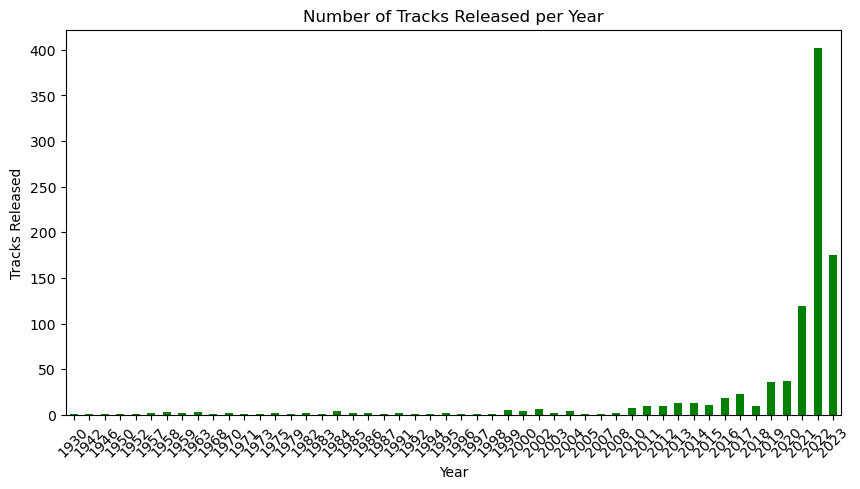

The number of tracks released per month that follow a pattern is shown above 


In [17]:
#Is there a number of tracks released per month that follow any noticeable patterns
i = df['released_year'].value_counts().sort_index()

plt.figure(figsize=(10, 5))
i.plot(kind='bar', color='green')
plt.title('Number of Tracks Released per Year')
plt.xlabel('Year')
plt.ylabel('Tracks Released')
plt.xticks(rotation=45)
plt.show()

print("The number of tracks released per month that follow a pattern is shown above ")

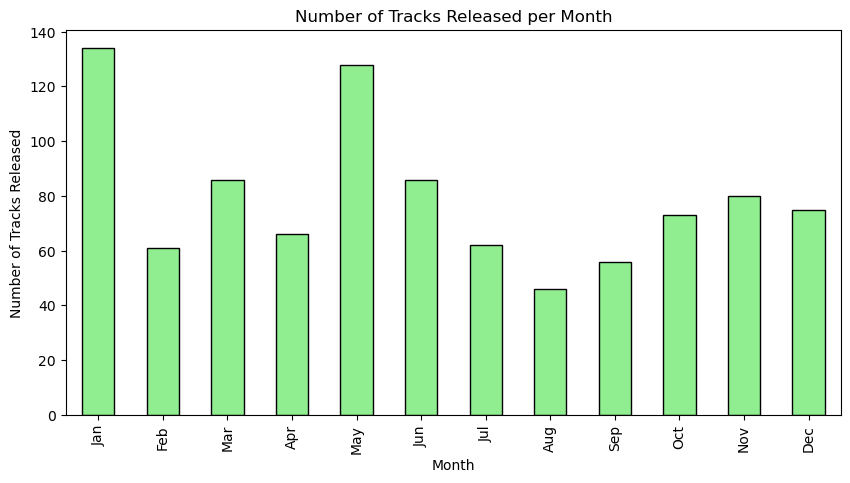

The month with the most releases is  1 or Jan.


In [18]:
#Find which of the month sees the most releases
j = df['released_month'].value_counts().sort_index()

plt.figure(figsize=(10, 5))
j.plot(kind='bar', color='lightgreen', edgecolor='black')
plt.title('Number of Tracks Released per Month')
plt.xlabel('Month')
plt.ylabel('Number of Tracks Released')
plt.xticks(range(12), ['Jan', 'Feb', 'Mar', 'Apr', 'May', 'Jun', 'Jul', 'Aug', 'Sep', 'Oct', 'Nov', 'Dec'])
plt.show()

k = j.idxmax()

print("The month with the most releases is ", k, "or Jan.")

### Genre and Music Characteristics

The correlation for streams and other attributes is shown above.


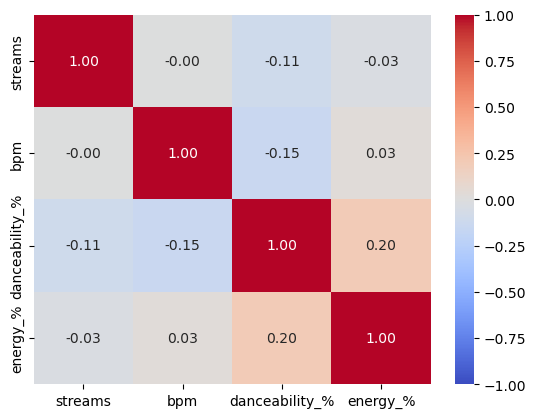

In [20]:
#Calculate the correlation for streams and other attributes
l = df.dropna(subset=['streams', 'bpm', 'danceability_%', 'energy_%'])
m = l[['streams', 'bpm', 'danceability_%', 'energy_%']].corr()

sns.heatmap(m, annot=True, cmap='coolwarm', fmt='.2f', vmin=-1, vmax=1)

print("The correlation for streams and other attributes is shown above.")

### Platform Popularity

In [22]:
#Find the column for faster and easier access to the Dataset
print(df.columns)

Index(['track_name', 'artist(s)_name', 'artist_count', 'released_year',
       'released_month', 'released_day', 'in_spotify_playlists',
       'in_spotify_charts', 'streams', 'in_apple_playlists', 'in_apple_charts',
       'in_deezer_playlists', 'in_deezer_charts', 'in_shazam_charts', 'bpm',
       'key', 'mode', 'danceability_%', 'valence_%', 'energy_%',
       'acousticness_%', 'instrumentalness_%', 'liveness_%', 'speechiness_%'],
      dtype='object')


In [23]:
#Count the number of tracks in each platform for easier camparison over the data set
n = df['in_spotify_playlists'].sum()
o = df['in_spotify_charts'].sum()
p = df['in_apple_playlists'].sum()

print("The number of tracks in each platform are the following: ") 
print("\n", n, " for in_spotify_playlists" )
print(o, " for in_spotify_charts")
print(p, " for in_apple_playlists", "\n\n")
print("Therefore we conclude that in_spotify_playlists have the most favor in popular tracks")

The number of tracks in each platform are the following: 

 4955719  for in_spotify_playlists
11445  for in_spotify_charts
64625  for in_apple_playlists 


Therefore we conclude that in_spotify_playlists have the most favor in popular tracks


### Advanced Analysis

In [25]:
#Calculate average streams based on the key and mode in the dataset
q = df.groupby(['key', 'mode'], observed = False)['streams'].mean().reset_index()

print("The analyzed streams based on Key and Mode are the following: (AVERAGED)", "\n\n", q)

The analyzed streams based on Key and Mode are the following: (AVERAGED) 

    key   mode           streams
0    A  Major  401960332.585366
1    A  Minor  417390630.969697
2   A#  Major  627533592.148148
3   A#  Minor       484923094.2
4    B  Major  436333624.942857
5    B  Minor   582511036.23913
6   C#  Major   628588294.20548
7   C#  Minor  566525199.276596
8    D  Major  572017994.909091
9    D  Minor  342558842.066667
10  D#  Major  681962300.166667
11  D#  Minor  479364677.285714
12   E  Major  760596278.764706
13   E  Minor  508326422.044444
14   F  Major       527931052.5
15   F  Minor  410283606.888889
16  F#  Major  417544999.566667
17  F#  Minor  595492093.883721
18   G  Major  492981262.454545
19   G  Minor       363759305.7
20  G#  Major  545804415.190476
21  G#  Minor  321903624.357143


In [43]:
#Analyze the data to compare the most frequently appearing artists in playlists or charts.
r = df[df['in_spotify_playlists'].notnull()]['artist(s)_name'].value_counts()
s = df[df['in_spotify_charts'].notnull()]['artist(s)_name'].value_counts()

print("Top most frequent artists that can be found in the playlists are...", "\n", r.head())
print("\n", "while...", "\n")
print("Top most frequent artists that can be found in the charts are...", "\n", s.head())

Top most frequent artists that can be found in the playlists are... 
 artist(s)_name
Taylor Swift    34
The Weeknd      22
Bad Bunny       19
SZA             19
Harry Styles    17
Name: count, dtype: int64

 while... 

Top most frequent artists that can be found in the charts are... 
 artist(s)_name
Taylor Swift    34
The Weeknd      22
Bad Bunny       19
SZA             19
Harry Styles    17
Name: count, dtype: int64
